In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import cvxopt

# 数理最適化

## 線型計画法
一次関数$f(x, y) = ax+by$の最小値を求める問題を線型計画問題という。  
線型計画問題の標準系は以下で書かれることがある。
$$
\begin{align}
\text{Minimize} \quad &c^Tx \\
\text{Subject to} \quad  &Gx \leq  h \\
  &Ax =  b
\end{align}
$$
[wikipedia](https://ja.wikipedia.org/wiki/%E7%B7%9A%E5%9E%8B%E8%A8%88%E7%94%BB%E6%B3%95)

In [2]:
c = np.array([-3, -4], dtype=np.float64)
G = np.array([[1,4], [2,3], [2,1]], dtype=np.float64)
h = np.array([1700, 1400, 1000], np.float64)
sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None))

print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688583


## 二次計画法
二変数の二次関数$f(x, y) = ax^2+bxy+cy^2+dx+ey$の最小値を求める問題を**二次計画問題**という。  
二次計画問題の標準形は以下で書かれることがある。
$$
\begin{align}
\text{Minimize} \quad &\frac{1}{2}x^TPx + q^Tx \\
\text{Subject to} \quad  &Gx \leq  h \\
\quad &Ax =  b
\end{align}
$$
[wikipedia](https://ja.wikipedia.org/wiki/%E4%BA%8C%E6%AC%A1%E8%A8%88%E7%94%BB%E6%B3%95#:~:text=%E4%BA%8C%E6%AC%A1%E8%A8%88%E7%94%BB%E6%B3%95%EF%BC%88%E3%81%AB,%E4%BA%8C%E6%AC%A1%E8%A8%88%E7%94%BB%E5%95%8F%E9%A1%8C%E3%81%A8%E3%81%84%E3%81%86%E3%80%82)  
二次計画法を解くためのライブラリは`conda install -c anaconda cvxopt`もしくは`pip install cvxopt`でインストールする。

In [26]:
P = cvxopt.matrix(np.array([[2,1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2,1], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q)

print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

[[-1.00000000e+00]
 [-1.48029737e-16]]
-1.0


## 勾配降下法
ある関数$f(x_k)$に対し、以下を計算する。なお、$k \in \mathbb{N}$
$$
x_{k+1} = x_k - \alpha \nabla f(x_k) \\
$$
適当な終了条件値$\epsilon$をとり、$| x_{k+1} | \leq \epsilon$で終了する。  
このようなアルゴリズムを**勾配降下法**あるいは**最急降下法**と呼ぶことがある。

In [2]:
class GradientDescent:
    # 関数とその導関数を引数に与える。alpha, epsは必要に応じて設定
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.x = None
        self.opt = None
        self.opt_ = None
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.history = None
        self.history_ = None
        
    # 初期値xを指定して勾配降下法を実施し、最適解x_と最適値opt_をセットする。
    # おまけで途中計算のxをhistoryに記録しておく。
    def set_solve(self, init_x):
        x = init_x
        history = []
        grad = self.df(x,)
        history.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            history.append(x)
        self.history_ = np.array(history)
        self.x_ = x
        self.opt_ = self.f(x)

勾配降下法を実行し、xの初期値からの遷移と等高線をプロットする。  
確かに、関数が最小値をとるような方向に近づいている。

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


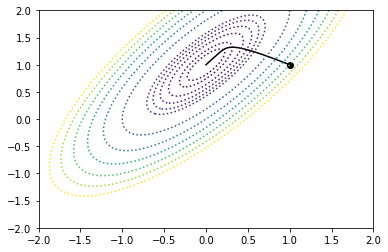

In [7]:
# 関数を定義
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

# 導関数
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

# 勾配降下法を実行
gradiantDescent = GradientDescent(f, df)
init_x = np.array([1, 1])
gradiantDescent.set_solve(init_x)

# 結果確認
print(gradiantDescent.x_)
print(gradiantDescent.opt_)

# 初期値プロット
plt.scatter(init_x[0], init_x[1], color="k", marker="o")

# historyプロット
plt.plot(gradiantDescent.history_[:, 0], gradiantDescent.history_[:, 1], color="k")

# 等高線プロット
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(x, y) # x, yの格子を作成。(x,y)を(xmesh[x,y], ymesh[x,y])とかで表せる
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)] # 行を取り出して結合
plt.contour(x, y, f(xx).reshape(xmesh.shape),
            levels=[-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4],
            linestyles="dotted") # 等高線

plt.show()

alphaの値を変えるとどうなるのか。

[5.50020447e-08 9.99999960e-01]
-2.9999999999999676


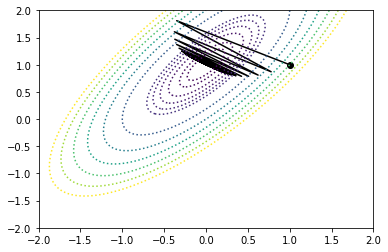

In [19]:
# 関数を定義
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

# 導関数
def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, -6 * x + 6 * y - 6])

# 勾配降下法を実行
gradiantDescent = GradientDescent(f, df, 0.135)
init_x = np.array([1, 1])
gradiantDescent.set_solve(init_x)

# 結果確認
print(gradiantDescent.x_)
print(gradiantDescent.opt_)

# 初期値プロット
plt.scatter(init_x[0], init_x[1], color="k", marker="o")

# historyプロット
plt.plot(gradiantDescent.history_[:, 0], gradiantDescent.history_[:, 1], color="k")

# 等高線プロット
x = np.linspace(-2, 2, 300)
y = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(x, y) # x, yの格子を作成。(x,y)を(xmesh[x,y], ymesh[x,y])とかで表せる
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)] # 行を取り出して結合
plt.contour(x, y, f(xx).reshape(xmesh.shape),
            levels=[-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4],
            linestyles="dotted") # 等高線

plt.show()

## ニュートン法
ある多変数関数$f(x)$が与えられた時、次のような手続きを考える。なお$J$はヤコビアン
$$
x_{k+1} = x_k - J_f(x_k)^{-1}f(x_k) \\
    || x_{k+1} - x_k|| \leq \epsilon \quad で終了
$$
この手続きによって、$f(x)=0$となる点を探ることができそう。

## ラグランジュ未定乗数法
とある目的関数$f(x)$と、その制約式$g(x)$が与えられたとする。  
次に、$L(x,y,\lambda ) = f(x) + \lambda g(x)$を考える。  
この時、最適解を与える方程式は以下となる。
$$
\nabla L(x, y, \lambda ) = 0
$$